Author: Franziska Haisch

# Exploring different Models

## K-Nearest Neighbors (KNN)

### Importing Nesessary Libaries

In [13]:
import os # for file handling
import numpy as np # for numerical operations
import cv2 # for image processing
import random # for random operations
import matplotlib.pyplot as plt # for plotting

from sklearn.neighbors import KNeighborsClassifier # for KNN
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve # for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

### Preprocessing
Adjusting the preprocessing part could prevent the models from overfitting, but we will drop the KNN models in favor of CNN models.

In [14]:
def image_preprocessing(image_path):
    # read image
    image = cv2.imread(image_path)
    # convert color to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # resize image
    image = cv2.resize(image, (16,16))
    # flatten the image
    image = image.flatten()

    return image

### Load Data

#### Functions 

In [15]:
import os
import numpy as np

def prepare_data_from_folders(folder_path, sample_fraction=1.0):
    """
    Prepares the data from a folder and allows for sampling a fraction of the data.

    Parameters:
    folder_path (str): The path to the folder containing the images.
    sample_fraction (float): The fraction of the data to sample. Default is 1.0 (100%).

    Returns:
    np.array: The features extracted from the images.
    np.array: The labels of the images.
    """
    # create empty lists to store the features and labels
    features = []
    labels = []

    # loop through the files in the folder which represent the labels
    for label in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, label) # get the path to the class folder
        if os.path.isdir(class_folder): # check if it is a directory
            for image_name in os.listdir(class_folder): # loop through the images in the class folder
                image_path = os.path.join(class_folder, image_name) # get the path to the image
                # extract the features from the image
                features.append(image_preprocessing(image_path))
                labels.append(label) # add the label to the list

    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    # Sample a fraction of the data
    if sample_fraction < 1.0:
        sample_size = int(len(features) * sample_fraction)
        indices = np.random.choice(len(features), sample_size, replace=False)
        features = features[indices]
        labels = labels[indices]

    return features, labels

In [34]:
def load_images_and_labels(image_folder, label_folder, sample_fraction=1.0):
    """
    Load images and labels from folders.

    Parameters:
    image_folder (str): The path to the folder containing the images.
    label_folder (str): The path to the folder containing the labels.
    sample_fraction (float): The fraction of the data to sample. Default is 1.0 (100%).

    Returns:
    np.array: The features extracted from the images.
    np.array: The labels of the images.
    """
    # create empty lists to store the features and labels
    features = []
    labels = []

    # loop through the images in the image folder
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name) # get the path to the image
        label_path = os.path.join(label_folder, image_name.replace(".jpg", ".txt")) # get the path to the label

        # extract the features from the image
        features.append(image_preprocessing(image_path))

        # read the label file and handle multiple labels
        image_labels = []
        with open(label_path, "r") as file:
            for line in file:
                label = line.split()[0] # read each label
                image_labels.append(label)

        # Combine all labels into a single string
        labels.append(" ".join(image_labels)) # add the combined label to the list

    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    # Sample a fraction of the data
    if sample_fraction < 1.0:
        sample_size = int(len(features) * sample_fraction)
        indices = np.random.choice(len(features), sample_size, replace=False)
        features = features[indices]
        labels = labels[indices]

    return features, labels

In [20]:
def plot_learning_curve(estimator, X, y):
    # Create a subplot for the learning curve
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot learning curve
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    ax.plot(train_sizes, train_scores_mean, label='Training score')
    ax.plot(train_sizes, val_scores_mean, label='Test score')
    ax.set_xlabel('Training Size')
    ax.set_ylabel('Score')
    ax.set_title('Learning Curve')
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

#### Pathes to the Datesets

In [18]:
# Satellite images - 4 classes - dataset
satellite_4c_ds_path = "../raw_data/satellite_images_4_classes"

# Satellite images - 14 classes - dataset
satellite_14c_ds_path = "../raw_data/satellite_images_14_classes"

# Wildfire images - 2 classes - dataset
wildfire_2c_ds_path = "../raw_data/wildfire_images_2_classes"

### Train the model

Accuracy: 89.11%, Best Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}, Best Score: 89.90%


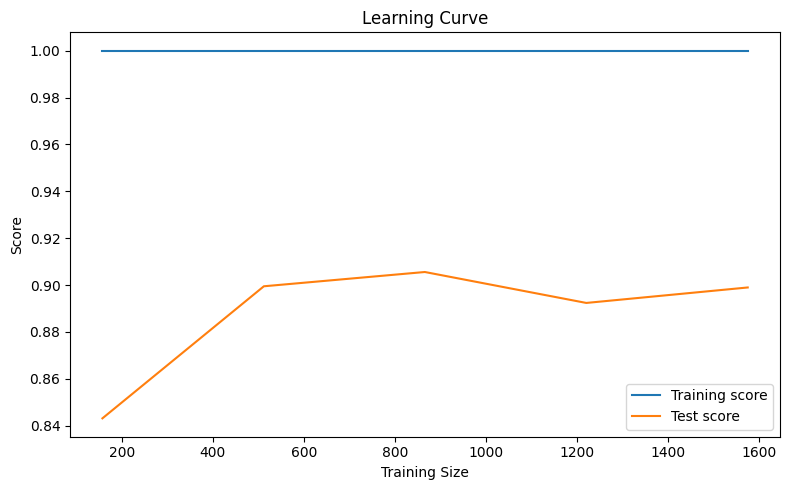

Classification Report:
              precision    recall  f1-score   support

      cloudy       0.91      0.94      0.93       218
      desert       0.97      0.90      0.93       165
  green_area       0.92      0.78      0.85       217
       water       0.81      0.93      0.87       245

    accuracy                           0.89       845
   macro avg       0.90      0.89      0.89       845
weighted avg       0.90      0.89      0.89       845

Confusion Matrix:
[[206   5   1   6]
 [ 16 149   0   0]
 [  0   0 170  47]
 [  4   0  13 228]]
Precision: 0.9035844590363403, Recall: 0.8905017036543693, F1-score: 0.8942244145669795


In [ ]:
# Satellite images - 4 classes - dataset
# parameter grid
param_grid = {
    'n_neighbors': [11],
    'weights': ['distance'],
    'metric': ['euclidean'],
    'algorithm': ['auto'],
    'leaf_size': [1]
}

sample_fraction = 0.5
X, y = prepare_data_from_folders(satellite_4c_ds_path, sample_fraction=sample_fraction)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}, Best Parameters: {best_params}, Best Score: {best_score:.2%}")

# Plot learning curves
plot_learning_curve(best_knn, X_train, y_train)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

/home/franziska/.pyenv/versions/3.10.6/envs/EnviroClass/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.27, Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}, Best Score: 0.17285714285714288


/home/franziska/.pyenv/versions/3.10.6/envs/EnviroClass/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


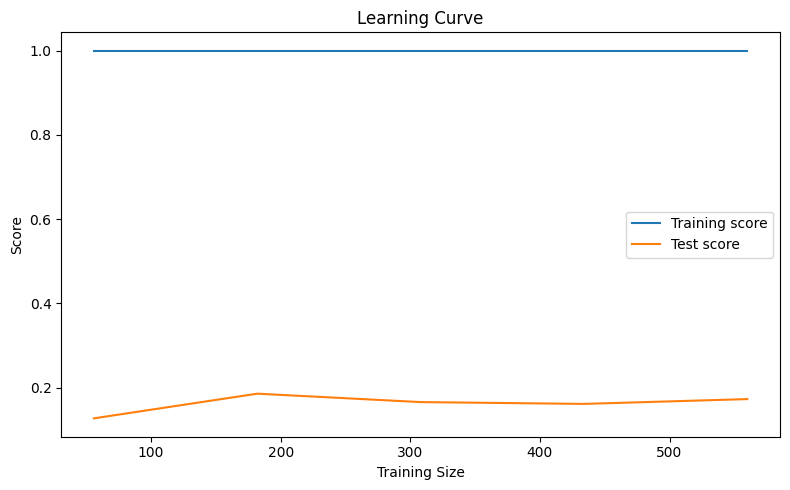

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.50      0.17         6
           1       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         8
        10 9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
           2       0.80      0.44      0.57         9
         2 2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
        3 12       0.00      0.00      0.00         1
        3 13       0.00      0.00      0.00         1
         3 6       0.00      0.00      0.00         1
         3 8       0.00      0.00      0.00         1
           4       0.73      0.85      0.79        13
           5       0.33      0.12      0.18         8
           6       0.17      0.89      0.29         9
    

/home/franziska/.pyenv/versions/3.10.6/envs/EnviroClass/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/franziska/.pyenv/versions/3.10.6/envs/EnviroClass/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/franziska/.pyenv/versions/3.10.6/envs/EnviroClass/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [37]:
# Satellite images - 14 classes - dataset
# parameter grid
param_grid = {
    'n_neighbors': [7],
    'weights': ['distance'],
    'metric': ['manhattan'],
    'algorithm': ['auto'],
    'leaf_size': [10]
}

sample_fraction = 1.0
X_train, y_train = load_images_and_labels(f"{satellite_14c_ds_path}/train/images", f"{satellite_14c_ds_path}/train/labels", sample_fraction=sample_fraction)
X_test, y_test = load_images_and_labels(f"{satellite_14c_ds_path}/test/images", f"{satellite_14c_ds_path}/test/labels")

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}, Best Parameters: {best_params}, Best Score: {best_score}")

# Plot learning curves
plot_learning_curve(best_knn, X_train, y_train)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

Premature end of JPEG file
Premature end of JPEG file


Accuracy: 0.816031746031746, Best Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}, Best Score: 0.8002819487246737


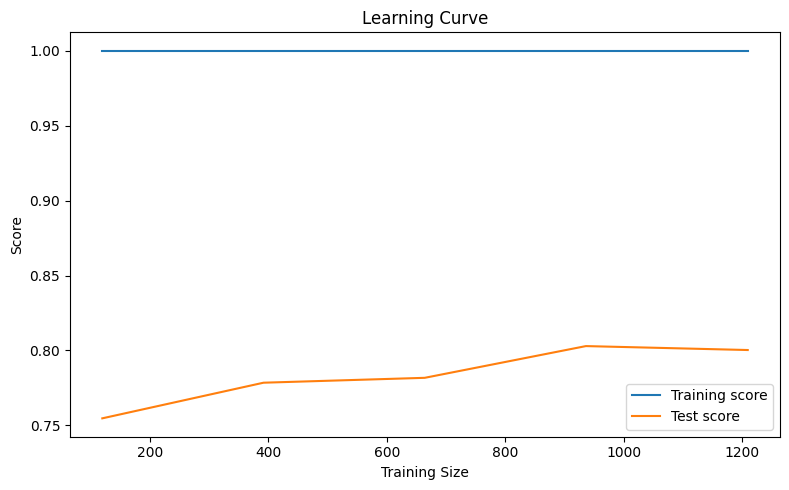

Classification Report:
              precision    recall  f1-score   support

  nowildfire       0.92      0.65      0.76      2820
    wildfire       0.77      0.95      0.85      3480

    accuracy                           0.82      6300
   macro avg       0.84      0.80      0.80      6300
weighted avg       0.84      0.82      0.81      6300

Confusion Matrix:
[[1821  999]
 [ 160 3320]]
Precision: 0.8439645841327293, Recall: 0.7998838346784054, F1-score: 0.8049915820044222


In [30]:
# Wildfire images - 2 classes - dataset
# parameter grid
param_grid = {
    'n_neighbors': [4],
    'weights': ['distance'],
    'metric': ['euclidean'],
    'algorithm': ['auto'],
    'leaf_size': [1]
}

sample_fraction = 0.05
X_train, y_train = prepare_data_from_folders(f"{wildfire_2c_ds_path}/train", sample_fraction=sample_fraction)
X_test, y_test = prepare_data_from_folders(f"{wildfire_2c_ds_path}/test")

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}, Best Parameters: {best_params}, Best Score: {best_score}")

# Plot learning curves
plot_learning_curve(best_knn, X_train, y_train)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")